<a href="https://colab.research.google.com/github/priyadharshinivijay/ehub/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

Using TensorFlow backend.


In [0]:
import pandas as pd

In [0]:
url="https://raw.githubusercontent.com/priyadharshinivijay/datasets/master/Sentiment.csv?token=AKEKHPKBK32QJIPB7YTSZH26VJWG6"
data=pd.read_csv(url)

In [5]:
print(len(data))

13871


In [0]:
data = data[['text','sentiment']]

In [0]:
data = data[data.sentiment != "Neutral"]

In [8]:
print(data)

                                                    text sentiment
1      RT @ScottWalker: Didn't catch the full #GOPdeb...  Positive
3      RT @RobGeorge: That Carly Fiorina is trending ...  Positive
4      RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  Positive
5      RT @GregAbbott_TX: @TedCruz: "On my first day ...  Positive
6      RT @warriorwoman91: I liked her and was happy ...  Negative
...                                                  ...       ...
13866  RT @cappy_yarbrough: Love to see men who will ...  Negative
13867  RT @georgehenryw: Who thought Huckabee exceede...  Positive
13868  RT @Lrihendry: #TedCruz As President, I will a...  Positive
13869  RT @JRehling: #GOPDebate Donald Trump says tha...  Negative
13870  RT @Lrihendry: #TedCruz headed into the Presid...  Positive

[10729 rows x 2 columns]


In [9]:
data['text'] = data['text'].apply(lambda x: x.lower())#change it all to lowercase to avoid any differences
print(data)


                                                    text sentiment
1      rt @scottwalker: didn't catch the full #gopdeb...  Positive
3      rt @robgeorge: that carly fiorina is trending ...  Positive
4      rt @danscavino: #gopdebate w/ @realdonaldtrump...  Positive
5      rt @gregabbott_tx: @tedcruz: "on my first day ...  Positive
6      rt @warriorwoman91: i liked her and was happy ...  Negative
...                                                  ...       ...
13866  rt @cappy_yarbrough: love to see men who will ...  Negative
13867  rt @georgehenryw: who thought huckabee exceede...  Positive
13868  rt @lrihendry: #tedcruz as president, i will a...  Positive
13869  rt @jrehling: #gopdebate donald trump says tha...  Negative
13870  rt @lrihendry: #tedcruz headed into the presid...  Positive

[10729 rows x 2 columns]


In [10]:
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))#remove unnecessary expressions like @
print (data)

                                                    text sentiment
1      rt scottwalker didnt catch the full gopdebate ...  Positive
3      rt robgeorge that carly fiorina is trending  h...  Positive
4      rt danscavino gopdebate w realdonaldtrump deli...  Positive
5      rt gregabbott_tx tedcruz on my first day i wil...  Positive
6      rt warriorwoman91 i liked her and was happy wh...  Negative
...                                                  ...       ...
13866  rt cappy_yarbrough love to see men who will ne...  Negative
13867  rt georgehenryw who thought huckabee exceeded ...  Positive
13868  rt lrihendry tedcruz as president i will alway...  Positive
13869  rt jrehling gopdebate donald trump says that h...  Negative
13870  rt lrihendry tedcruz headed into the president...  Positive

[10729 rows x 2 columns]


In [11]:
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
print (data)

                                                    text sentiment
1        scottwalker didnt catch the full gopdebate l...  Positive
3        robgeorge that carly fiorina is trending  ho...  Positive
4        danscavino gopdebate w realdonaldtrump deliv...  Positive
5        gregabbott_tx tedcruz on my first day i will...  Positive
6        warriorwoman91 i liked her and was happy whe...  Negative
...                                                  ...       ...
13866    cappy_yarbrough love to see men who will nev...  Negative
13867    georgehenryw who thought huckabee exceeded t...  Positive
13868    lrihendry tedcruz as president i will always...  Positive
13869    jrehling gopdebate donald trump says that he...  Negative
13870    lrihendry tedcruz headed into the presidenti...  Positive

[10729 rows x 2 columns]


In [12]:
batch_size = 5000
tokenizer = Tokenizer(nb_words=batch_size, split=' ')#split as words

tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
#convert the text into stream of numbers so it can be fed into the computer

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [13]:
for ll in X:
    print(len(ll), ll)

Streaming output truncated to the last 5000 lines.
17 [2, 54, 287, 397, 8, 344, 734, 16, 1, 1387, 37, 3024, 8, 7, 24, 60, 241]
11 [83, 5, 20, 41, 411, 751, 543, 296, 7, 77, 2]
22 [3419, 81, 19, 1331, 11, 258, 70, 909, 78, 1, 103, 271, 16, 1587, 12, 338, 5, 19, 47, 38, 11, 2]
10 [1379, 102, 2643, 431, 3761, 7, 12, 2, 275, 2180]
12 [280, 1, 1236, 358, 60, 66, 347, 29, 1, 108, 117, 2]
7 [1081, 6, 2193, 27, 241, 1669, 2]
20 [3582, 343, 652, 22, 735, 522, 33, 1639, 14, 99, 234, 278, 2409, 16, 72, 179, 3642, 246, 4599, 4765]
9 [224, 1063, 12, 14, 112, 2, 200, 108, 117]
17 [419, 36, 418, 1, 2, 32, 148, 7, 139, 849, 901, 2568, 3549, 154, 2569, 576, 2237]
20 [10, 1, 35, 43, 28, 4, 152, 23, 18, 5, 161, 13, 14, 95, 62, 227, 74, 27, 175, 2]
9 [395, 488, 6, 2, 5, 470, 14, 13, 44]
17 [2, 5, 13, 80, 113, 16, 15, 34, 1282, 42, 35, 147, 64, 1083, 469, 193, 1387]
28 [9, 43, 65, 20, 33, 68, 577, 3846, 1, 2, 41, 9, 64, 200, 7, 558, 6, 1, 395, 682, 378, 13, 69, 14, 1041, 6, 1, 833]
2 [146, 2]
20 [93, 15, 1

In [14]:
maxx = 0
c=0
for ll in X:
    c=len(ll)
    if c>maxx:
        maxx=c
print('Max',maxx)
X = pad_sequences(X)
print(len(X[0]))
print (X)

Max 29
29
[[   0    0    0 ... 1324 1409  743]
 [   0    0    0 ...  233  724   17]
 [   0    0    0 ...  207  371  670]
 ...
 [   0    0    0 ...   72   65    3]
 [   0    0    0 ... 1022 1423   74]
 [   0    0    0 ...  197    3  723]]


In [15]:
embed_dim = 128
lstm_out = 128
model = Sequential()#call the sequential model
model.add(Embedding(batch_size, embed_dim,input_length = X.shape[1], dropout=0.2))

model.add(LSTM(lstm_out, dropout_U=0.2, dropout_W=0.2))
model.add(Dense(2,activation='softmax'))#
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 128)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 771,842
Trainable params: 771,842
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
print(data['sentiment'].values)
Y = pd.get_dummies(data['sentiment']).values
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

['Positive' 'Positive' 'Positive' ... 'Positive' 'Negative' 'Positive']
[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [1 0]
 [0 1]]
(7188, 29) (7188, 2)
(3541, 29) (3541, 2)


In [17]:
model.fit(X_train, Y_train, nb_epoch = 3, batch_size=32, verbose = 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
 - 12s - loss: 0.4219 - accuracy: 0.8214
Epoch 2/3
 - 11s - loss: 0.2763 - accuracy: 0.8856
Epoch 3/3
 - 11s - loss: 0.2151 - accuracy: 0.9140


In [0]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json

In [0]:
ckey="kjz1HQ2ZZVlFLQv60V9tIrM4x"
csecret="gBNH3yDaV0EePilQAQnoQqDP8baFVfMGu5laqWPtaE4dYrChHl"
atoken="1070311857498386432-7RHEqdoC7VufWUDDlCyeEK1LoakWSv"
asecret="QdzvTqdGDh9JNJHkf5acg5uqFSdh547PtORBTvFXImgIg"


In [0]:
class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)
        
        tweet = all_data["text"]
        s2 = tweet
        hh = tokenizer.texts_to_sequences([s2])
        X_test[9].shape
        hh = pad_sequences(hh, maxlen=29)
        hh=np.array(hh[0]).reshape(1,29)
        x=model.predict(hh)
        print(x)
        if(x[0][0]>x[0][1]):
            sentiment_value='negative'
        else:
            sentiment_value='positive'
        fp=open("sentiment_text.txt","a")
        fp.write(sentiment_value)
        fp.write('\n')
        fp.close()
        print((tweet,sentiment_value))
        
        return True

    def on_error(self, status):
        print (status)

In [31]:
fp=open("sentiment_text.txt","w")
fp.close()
liveword=input("Enter the topic:")

Enter the topic:oppo


In [32]:
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=[liveword])

[[0.52807826 0.47192177]]
('私が選んだ答えは『 #集荷修理サービス 』 @OPPOJapanをフォローしてから、ハッシュタグを選んでツイートすると #OPPO #RenoA など豪華賞品が当たる #OPPOゴールデンクイズ', 'negative')
[[0.76824915 0.23175077]]
('RT @Bimbsy2: Charging over night is a thing of the past😁Say hello to OPPO phones\nTo make enquiry send DM https://t.co/NAfsITRx0Z', 'negative')
[[0.9528283  0.04717169]]
('RT @ShivamP57383132: Hii friends\nOppo ETI11 appear on FCC, images revealed.\n#oppo https://t.co/uq2OktIt8B', 'negative')
[[0.67245615 0.32754382]]
('RT @bkpp_family: pp updated ig’s story \nเค้กสวยๆจากผู้ใหญ่ใจดี ขอบคุณ oppo ที่เอ็นดูน้องนะคะ ❤️🙇🏼\u200d♀️ \n\n #21PPsBDay https://t.co/hL2CfBHhtp', 'negative')
[[0.52807826 0.47192177]]
('私が選んだ答えは『 #集荷修理サービス 』 @OPPOJapanをフォローしてから、ハッシュタグを選んでツイートすると #OPPO #RenoA など豪華賞品が当たる #OPPOゴールデンクイズ', 'negative')
[[0.86274797 0.13725203]]
('@nazwadwii Hp nya Oppo a3s behahahaha sama', 'negative')
[[0.52807826 0.47192177]]
('私が選んだ答えは『 #Twitterチャットサービス 』 @OPPOJapanをフォローしてから、ハッシュタグを選んでツイートすると #OPPO #RenoA など豪華賞品が当たる #OPPO

KeyboardInterrupt: ignored

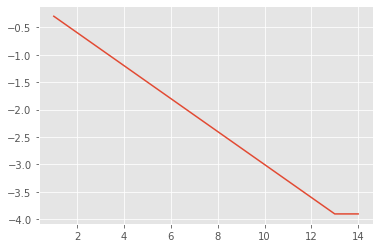

In [33]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("sentiment_text.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 0.3

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)

ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.title("sentiment analysis")
plt.xlabel('number of tweets')
plt.ylabel('scale of positivity')
plt.show()
